__LGMVIP-Data Science__

__Task 6: Stock Market Prediction and Forecasting using stacked LSTM__

__-by Omkar Jalgaonkar__

**Importing the required python libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
%time
import tensorflow as tf
import tensorflow_datasets as tdfs
from tensorflow import keras

Wall time: 0 ns


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [4]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
df.shape

(2035, 8)

In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


**To find if data has any missing values**

In [9]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

**It has no missing values.**

# Data Visualisation

Text(0, 0.5, 'Open Price')

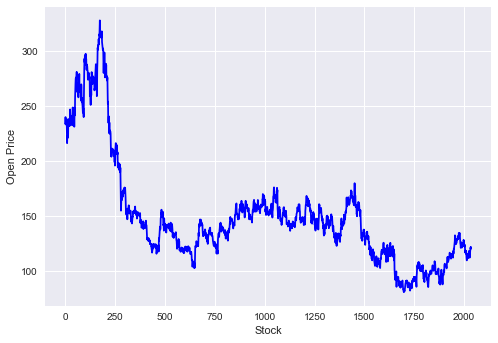

In [10]:
plt.style.use('seaborn')
plt.plot(df['Open'],'b')
plt.xlabel('Stock')
plt.ylabel('Open Price')

Text(0, 0.5, 'Close Price')

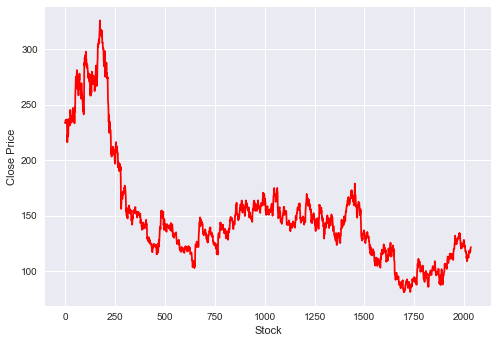

In [11]:
plt.plot(df['Close'],'r')
plt.xlabel('Stock')
plt.ylabel('Close Price')

**Scatter Matrix**

In [12]:
from pandas.plotting import scatter_matrix

In [13]:
cols=['Open','High','Low','Last','Total Trade Quantity','Turnover (Lacs)']

array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Last', ylabel='Open'>,
        <AxesSubplot:xlabel='Total Trade Quantity', ylabel='Open'>,
        <AxesSubplot:xlabel='Turnover (Lacs)', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Last', ylabel='High'>,
        <AxesSubplot:xlabel='Total Trade Quantity', ylabel='High'>,
        <AxesSubplot:xlabel='Turnover (Lacs)', ylabel='High'>],
       [<AxesSubplot:xlabel='Open', ylabel='Low'>,
        <AxesSubplot:xlabel='High', ylabel='Low'>,
        <AxesSubplot:xlabel='Low', ylabel='Low'>,
        <AxesSubplot:xlabel='Last', ylabel='Low'>,
        <AxesSubplot:xlabel='Total Trade Quantity', ylabel='Low'>,
        <AxesSubplot:xlabel='Turnover (Lacs)', ylabe

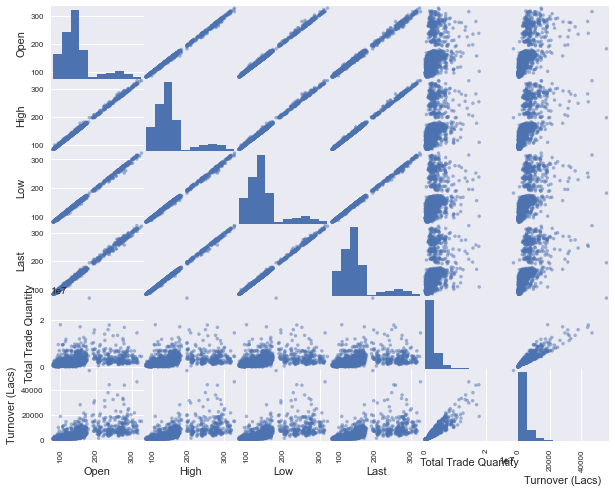

In [14]:
scatter_matrix(df[cols],figsize=(10,8),grid=True)

**In stock market, profit or loss is determined by closing price of a stock for the day.**

In [15]:
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index=df['Date']

Text(0, 0.5, 'Close Price')

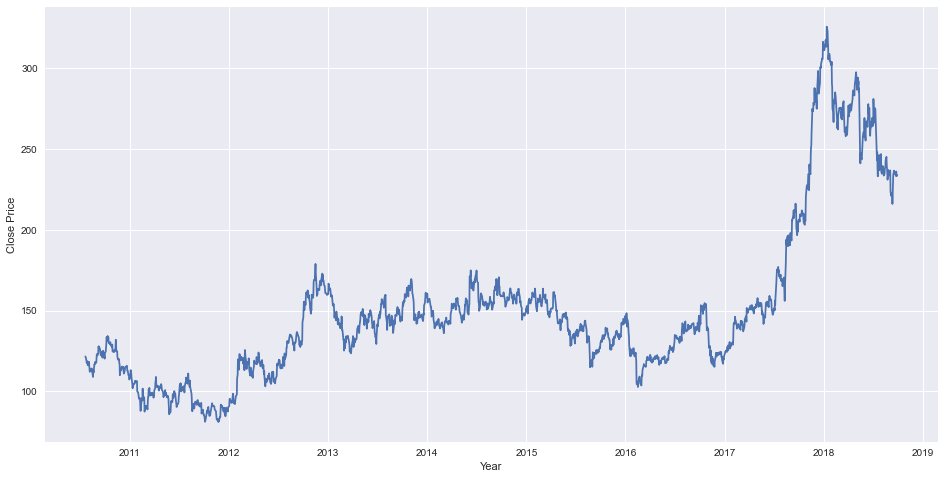

In [16]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='Close Price History')
plt.xlabel('Year')
plt.ylabel('Close Price')

# Training and testing of data

In [17]:
X=df[["Close"]]

In [19]:
X.head()

,Close
Date,
2018-09-28,233.75
2018-09-27,233.25
2018-09-26,234.25
2018-09-25,236.10
2018-09-24,233.30


In [20]:
Y=df["Close"].values

In [21]:
size=int(X.shape[0]*0.8)
size

1628

In [22]:
train=X.iloc[:size]
test=X.iloc[size:]

In [23]:
print(train.shape)
print(test.shape)

(1628, 1)
(407, 1)


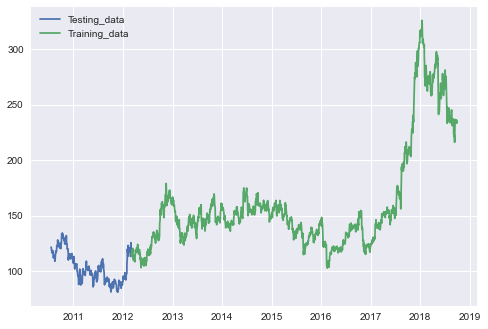

In [24]:
plt.plot(test,label="Testing_data")
plt.plot(train,label="Training_data")
plt.legend()

In [25]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms.fit(train)
s_train=ms.transform(train)
s_test=ms.transform(test)

# Stacked LSTM implementation

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation="relu",input_shape=(10,1)))
model.add(LSTM(100,activation="relu"))
model.add(Dense(1))
model.compile(loss="mse",optimizer="adam")

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.preprocessing.sequence import TimeseriesGenerator
gen=TimeseriesGenerator(s_train,s_train,length=10,batch_size=10)

In [29]:
model.fit_generator(gen,epochs=55,steps_per_epoch=15)

c:\users\omkar\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/55
15/15 [==============================] - 22s 10ms/step - loss: 0.1933
Epoch 2/55
15/15 [==============================] - 0s 10ms/step - loss: 0.0031
Epoch 3/55
15/15 [==============================] - 0s 9ms/step - loss: 0.0374
Epoch 4/55
15/15 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 5/55
15/15 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 6/55
15/15 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 7/55
15/15 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 8/55
15/15 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 9/55
15/15 [==============================] - 0s 10ms/step - loss: 0.0044
Epoch 10/55
15/15 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 11/55
15/15 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 12/55
15/15 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 13/55
15/15 [=====================

__Testing generating Time Series Data__

In [30]:
gen_test=TimeseriesGenerator(s_test,s_test,length=10,batch_size=1)

In [31]:
xtest=[]
ytest=[]
for i in range(len(gen_test)):
  x,y=gen_test[i]
  xtest.append(x[0])
  ytest.append(y[0][0])

In [32]:
xtest[0]

array([[0.07956074],
       [0.08023308],
       [0.09278351],
       [0.10264455],
       [0.08090542],
       [0.04661587],
       [0.0775437 ],
       [0.07776782],
       [0.06521739],
       [0.08135365]])

In [33]:
pred=model.predict(gen_test)

In [34]:
actual=ms.inverse_transform(np.array(ytest).reshape(-1, 1))
pred=ms.inverse_transform(pred)

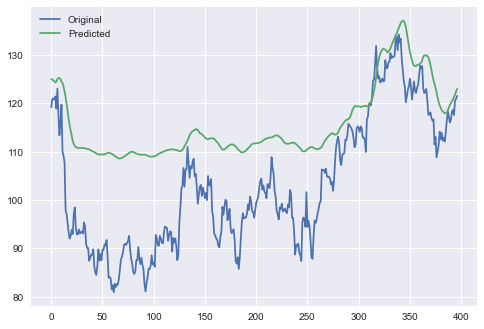

In [35]:
plt.plot(actual,label="Original")
plt.plot(pred,label="Predicted")
plt.legend()